In [1]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Can we draw conclusions from a sample?


**Why can we draw conclusions from a sample?** To answer this question, let's carry out an experiment.



Below we have three different data sets that show us different distribution formats:


* 1️⃣ **Retirement Age** We collected retirement age data from a sample, and when analyzing the histogram of these ages, we observed that there is a concentration in the average age range, but some people retire earlier.

* 2️⃣ **Lifespan of a lamp**: it is essential to ensure quality, energy efficiency and plan maintenance strategies. Knowing how a lamp lives we can offer reliable guarantees, it is expected that few lamps have a short lifespan (premature failures), with a long lifespan the probability of the lamp lasting decreases.

* 3️⃣ **Employee height**: Understanding the distribution of employee heights is crucial for designing an ergonomic work environment. This helps adapt workstations, chairs and equipment to ensure comfort and efficiency.

In [2]:
#Reading data

# retirement age
retirement_age_data = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Lifetime of a Lamp
data_lamp_duration = pd.read_csv("/content/dados_vida_lampada.csv")

# Height of employees
height_data = pd.read_csv("/content/dados_alturas.csv")

<ipython-input-3-b4cb86b9ad50>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


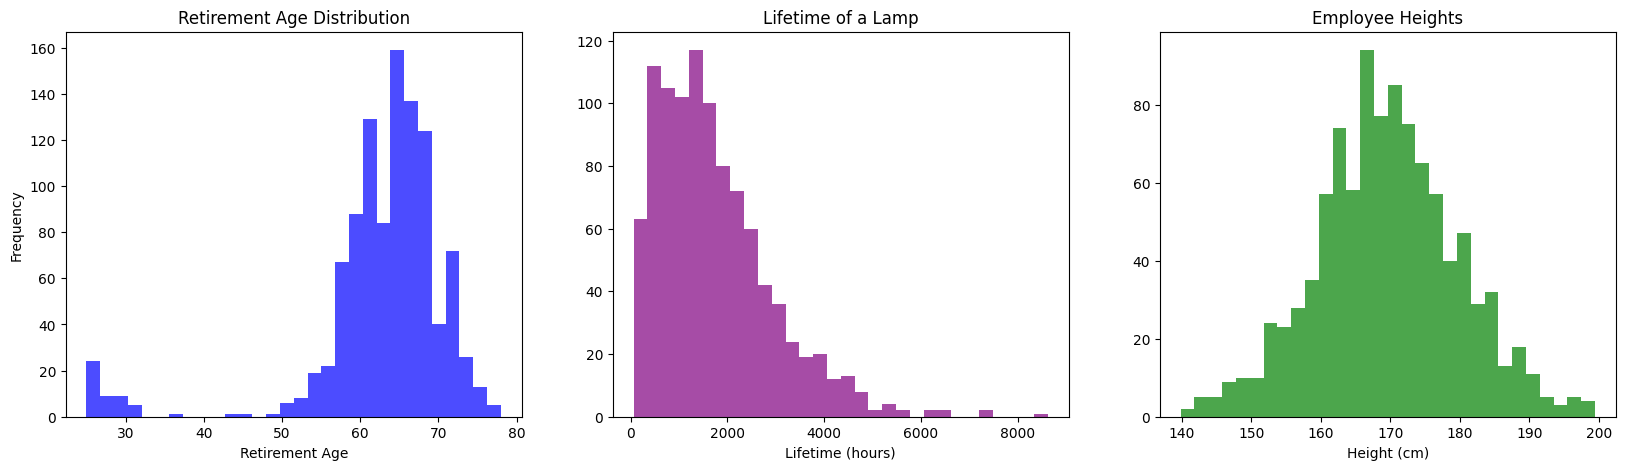

In [3]:
# Various distributions
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Retirement Age Distribution')
plt.xlabel('Retirement Age')
plt.ylabel('Frequency')
plt.hist(retirement_age_data, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(data_lamp_duration, bins=30, alpha=0.7, color='purple')
plt.title('Lifetime of a Lamp')
plt.xlabel('Lifetime (hours)')

plt.subplot(133)
plt.hist(height_data, bins=30, alpha=0.7, color='green')
plt.title('Employee Heights')
plt.xlabel('Height (cm)')

plt.show()

In [4]:
# Resampling

# sample size
n = 100

# number of samples
qnt = 1000

# resampling and averaging function
def resample_and_average(data, columns, n, qnt):
  mean = [data[columns].sample(n=n, replace=True).mean() for _ in range(qnt)]
  return mean


In [5]:
# Performing resampling with the function
mean_age = resample_and_average(retirement_age_data, 'idade', n, qnt)
mean_duration = resample_and_average(data_lamp_duration, 'duracao', n, qnt)
mean_height = resample_and_average(height_data, 'alturas', n, qnt)

#### **Population vs Sample**
Let's **compare** now the original distribution with the sample distribution, comparing the mean of the original distributions and the mean distribution of the sample means.

In [6]:
print("***** Population averages *****")

print("age:", retirement_age_data['idade'].mean())
print("duration:", data_lamp_duration['duracao'].mean())
print("height:", height_data['alturas'].mean())

***** Population averages *****
age: 62.70857142857143
duration: 1731.8036029420002
height: 169.52022


In [7]:
def Average(lst):
    return sum(lst) / len(lst)

print("*****  Sample averages *****")

print("age:", Average(mean_age))
print("duration:", Average(mean_duration))
print("height:", Average(mean_height))

*****  Sample averages *****
age: 62.6951099999999
duration: 1722.6802781262493
height: 169.47749029999994



#The sample means are **very close to the mean** of the original distributions. Let’s understand how the sample means are distributed?

<ipython-input-8-4e639bfdc47d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


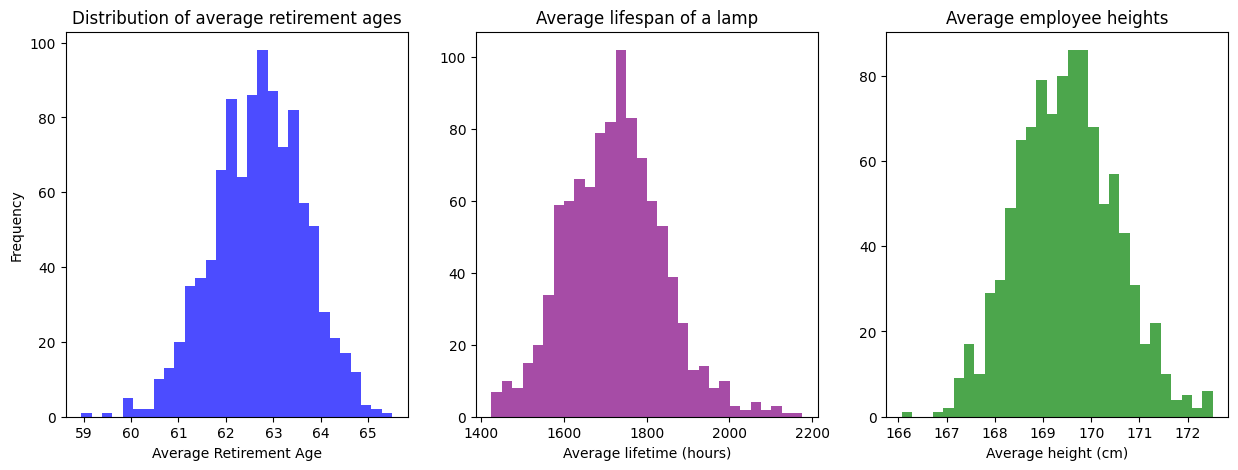

In [8]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribution of average retirement ages')
plt.xlabel('Average Retirement Age')
plt.ylabel('Frequency')
plt.hist(mean_age, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(mean_duration, bins=30, alpha=0.7, color='purple')
plt.title('Average lifespan of a lamp')
plt.xlabel('Average lifetime (hours)')

plt.subplot(133)
plt.hist(mean_height, bins=30, alpha=0.7, color='green')
plt.title('Average employee heights')
plt.xlabel('Average height (cm)')

plt.show()

## 1.3 What is our sample information?

The lamp industry hired us! And a new check on the indications was carried out, collecting the duration of other indications, we already know that we can infer and draw conclusions from this sample. We are informed that the average duration of this new experiment was **1200 hours.**

In [9]:
# average new sample
mean_new_sample = 1200


In [10]:
# original average
data_lamp_duration['duracao'].mean()

1731.8036029420002

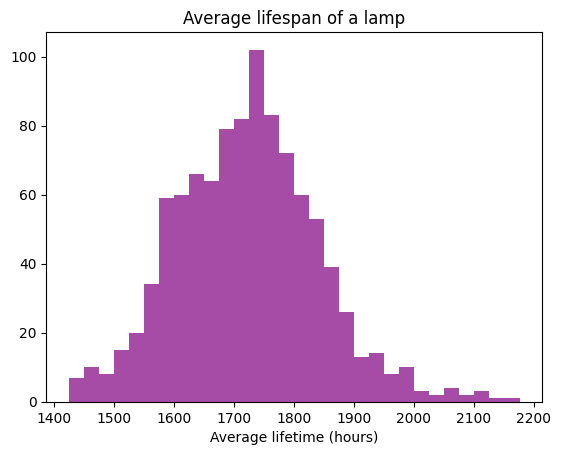

In [11]:
# # How far is this average from the behavior?

plt.hist(mean_duration, bins=30, alpha=0.7, color='purple')
plt.title('Average lifespan of a lamp')
plt.xlabel('Average lifetime (hours)')
plt.annotate('.', xy=(mean_new_sample, 0), xytext=(mean_new_sample, 100), fontsize=8,
              arrowprops=dict(facecolor='green'))
plt.show()

From the previous TLC experiment, we know that a lamp lasts an average of 1732 hours. When we came across the results of this new experiment, we saw that the average lamp duration is much shorter than expected, 1200 hours. Your intuition makes you question:

* Are these data correct?
* Are we dealing with the same type of lamps?
* If everything is true, then it seems that factory lamps need to undergo quality control for their materials.

But before informing your intuition, another question remains in the air: **how confident can I ask them to check the quality of the lamps?** To answer this question, we need to understand how far the average of this new sample is from the population sample.

And for this we return to the experiment of sample means.

In [12]:
# transforming averages_duration into DataFrame
duration_samples = pd.DataFrame({'mean_duration': mean_duration})

In [13]:
# calculating information
mean_of_mean = duration_samples['mean_duration'].mean()
SE = duration_samples['mean_duration'].std()

print("*****  Sample Averages *****")
print("mean:", mean_of_mean )
print("Standard Error:", SE )

*****  Sample Averages *****
mean: 1722.68027812625
Standard Error: 118.14110024847167


In [14]:
# How much erros?
1732 - 3*SE

1377.576699254585

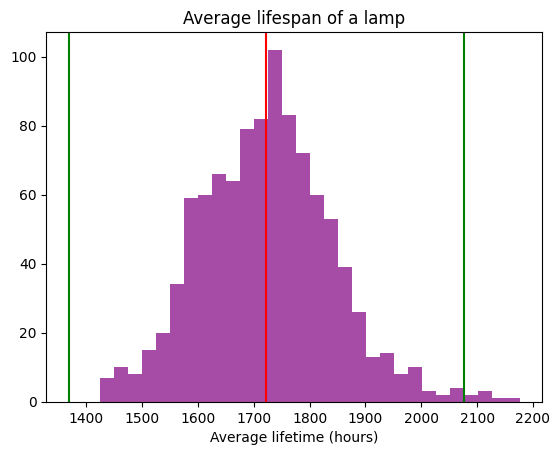

In [15]:
# Viewing the number of samples between 3SE +- of the average.

# # How far is this average from the behavior?

plt.hist(mean_duration, bins=30, alpha=0.7, color='purple')
plt.title('Average lifespan of a lamp')
plt.xlabel('Average lifetime (hours)')
plt.axvline(mean_of_mean - 3*SE, color='green')
plt.axvline(mean_of_mean + 3*SE, color='green')
plt.axvline(mean_of_mean, color='red')
plt.annotate('.', xy=(mean_new_sample, 0), xytext=(mean_new_sample, 100), fontsize=8,
              arrowprops=dict(facecolor='green'))
plt.show()



This sense of variability brings us to the notion of the level of confidence in decisions based on samples. Returning to the new experiment, 1200 hours average for the new lamps is much less than 3 standard errors. Thanks to the power of this symmetrical format, we can understand how many averages are plus or minus three SE, but how much does that mean?
To do this, we will count the observations in this interval.

In [16]:
#how much is in the range of +or- 3 SE?
qnt_obs = duration_samples[(duration_samples > mean_of_mean - 3*SE) & (duration_samples < mean_of_mean + 3*SE)]

In [17]:
# how much does this represent?
qnt_obs.count()/duration_samples.count()*100

mean_duration    99.3
dtype: float64

This indicates that if the data is correct and we are talking about the same type of lamps, we can inform quality control of the verification at a confidence level of 99.7%.

## 1.4 Establishing a confidence interval


To establish a range that contains the true average duration of the lamps, we will take 3 aspects into consideration:

* Average duration
* Confidence level
* The variability of my data.

In this interval we add an error margin to the mean, thus containing the confidence level and the variability of the data.

Here in Python, we will import the library to help us with this calculation.

In [18]:
#import stats

from scipy import stats

In [19]:
# take this sample into account
data_lamp_duration

# defined trust level
confidence = 0.95

We can establish a confidence level of 0.95, which means, according to TCL, that for 95 samples out of 100, the sample mean will be within two EP of the real mean. The confidence level is a criterion that must be established with decision makers, as it is related to the error and the restriction of this range.

In [20]:
##information for the confidence interval

mean_ic = data_lamp_duration['duracao'].mean()
std_ic = data_lamp_duration['duracao'].std()
n_ic = len(data_lamp_duration)

In [21]:
# Calculating confidence interval

ic = stats.norm.interval(confidence, loc=mean_ic, scale=std_ic/np.sqrt(n_ic))

In [22]:
# viewing the results

print("*****  Confidence Interval (95%) *****")
print(ic)

*****  Confidence Interval (95%) *****
(1658.3741665835487, 1805.2330393004518)


# 2. Test for a sample



> Case 3: Establish duration: We were hired for another project for the light bulb industry, but this time to establish whether the average duration of all the brand's Christmas bulbs is equal to or different from 1570 hours.

2.1 Formulating the hypothesis

Having established the hypotheses,

$H_0 : \mu = 1570$\
$H_1 : \mu \neq 1570$

We can identify the criteria to reject or not the established hypothesis, but first we will know our critical region, the rejection criterion.

## 2.2 Establishing the decision rule

To make this decision and calculate the probability of assuming an error, we need to consider a decision rule, that is, understand when we will assume that Ho is rejected.

For this rule, we can take into account a concept that we have already seen here, the confidence interval, which establishes a margin of error for the average based on a level of confidence in the variability of the data.

In [23]:
# null hypothesis

H0 = 1570

In [24]:
# sample data
christmas_lamps = pd.read_csv('/content/experimento_lampadas_natalinas.csv')


In [25]:
christmas_lamps

,Unnamed: 0,duracao
0,0,1541.121474
1,1,1523.495329
2,2,1521.732707
3,3,1523.280091
4,4,1530.643374
...,...,...
95,95,1523.112501
96,96,1528.213843
97,97,1513.689417
98,98,1532.400532


In [26]:
# sample average
christmas_lamps['duracao'].mean()

1529.5081310675512

In [27]:
#information for the critical region

confidence = 0.95                   #Desired confidence level
population_standard_deviation = 105 #sigma given by the factory
sample_size = len(christmas_lamps['duracao'])

In [28]:
print(sample_size)

100


In [29]:
# calculation confidence interval

ic_christmas = stats.norm.interval(confidence, loc=H0, scale=population_standard_deviation/np.sqrt(sample_size))


In [30]:
print('IC (95%):', ic_christmas)

IC (95%): (1549.4203781623294, 1590.5796218376706)


Calculating the sample mean, we obtain 1529.50 hours, this value is not contained in the acceptance region. In other words, we cannot say that the average duration of the lamps is 1570 with 95% confidence.

  But how likely is it that you are incorrectly rejecting Ho? To do this, we need to understand the errors associated with this decision.

## 2.3 Errors associated with hypothesis testing
Whatever decision we make, we are subject to making mistakes: \
The error of rejecting Ho when in fact she is true, and the error of not rejecting Ho but she is false.

## 2.4 To what degree are we rejecting the hypothesis?


Note that so far we have established a level of confidence to interpret our results, however our decision may change depending on the rigor of confidence we establish

In [31]:
#importing the Z test from statsmodels

from statsmodels.stats.weightstats import ztest

In [32]:
# Running the z test
stats, p_value = ztest(x1=christmas_lamps['duracao'], value=1570, alternative='two-sided')


In [33]:
# sample average

christmas_lamps['duracao'].mean()

1529.5081310675512

In [34]:
# Print p_value

print(f'Value-p: {p_value}')

Value-p: 0.0


In [35]:
# Check null hypothesis based on p-value


if p_value < 0.05:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Does not reject the null hypothesis"


print("Conclusion:", conclusion)

Conclusion: Reject the null hypothesis


> **Case 2:** A software company is interested in checking whether the average response time of its technical support is **less than 30 minutes**, as promised in the service level agreement (SLA). They collect data on response times for a sample of 25 support requests.


In [36]:
# Response time in minutes for 25 support requests
response_time = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [37]:
# Calculate the average response time
average_response_time = sum(response_time) / len(response_time)

print("Average Response Time:", average_response_time)


Average Response Time: 29.96


#hypothesis

*   h0 = 30   #minutes
*   h1 < 30  #minutes


## 3.2 Applying the T Test


When we do not have information about the variability of our population, especially when our sample is small. We continue with a t-test, which follows the same principle as the z-test.

In [38]:
#import ttest_1samp
from scipy.stats import ttest_1samp


In [39]:
# prompt: # Perform one-sided t-test for one sample

statistic, p_value = ttest_1samp(a=response_time, popmean=30, alternative='less')

# Display the results
print("Statistic:", statistic)
print("P-value:", p_value)


Statistic: -0.10506930292746224
P-value: 0.4585970095667924



## 3.3 Interpreting the T Test

![](https://i.imgur.com/3yvNUJR.png)

In [40]:
significance_level = 0.05

if p_value < significance_level:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Does not reject the null hypothesis"


conclusion

'Does not reject the null hypothesis'

## 4.1 Independent samples

> Case 5: We are providing consultancy for an e-commerce company, and in the middle of a meeting a hypothesis arises: "Advertising has a positive effect on sales" Can we insert more advertisements on the website to increase sales?

In [41]:
sales_with_advertising = [329.80,  291.70,  338.86,  391.38,
                         285.95,  285.95,  394.75,  346.05,
                         271.83,  332.55,  272.19,  272.06,
                         314.52,  185.20,  196.50,  266.26,
                         239.23,  318.85,  245.52,  215.26,
                         387.94,  286.45,  304.05,  214.52,
                         267.34,  306.66,  230.94,  322.54,
                         263.96,  282.50,  263.90,  411.14,
                         299.19,  236.54,  349.35,  226.75,
                         312.53,  182.42,  220.31,  311.81,
                         344.31,  310.28,  293.06,  281.93,
                         211.29,  256.81,  272.36,  363.43,
                         320.62,  194.22]

In [42]:
sales_without_advertising = [304.44,  261.89,  244.38,  321.70,
                         346.86,  340.88,  234.65,  266.45,
                         304.88,  343.53,  256.25,  273.86,
                         218.62,  213.23,  333.75,  366.37,
                         280.68,  345.21,  306.70,  246.29,
                         306.68,  377.28,  282.85,  378.88,
                         127.82,  334.31,  290.22,  267.06,
                         290.51,  165.74,  271.82,  306.43,
                         373.67,  253.90,  236.49,  254.89,
                         339.92,  304.73,  253.21,  315.80,
                         290.82,  343.12,  242.88,  265.34,
                         261.47,  197.19,  302.77,  300.66,
                         285.31,  270.92]

In [43]:
# Calculate the average sales with advertising
average_sales_with_advertising = sum(sales_with_advertising) / len(sales_with_advertising)

# Calculate the average sales without advertising
average_sales_without_advertising = sum(sales_without_advertising) / len(sales_without_advertising)

# Print the results
print("Average Sales with Advertising:", average_sales_with_advertising)
print("Average Sales without Advertising:", average_sales_without_advertising)

Average Sales with Advertising: 286.4712
Average Sales without Advertising: 286.0662


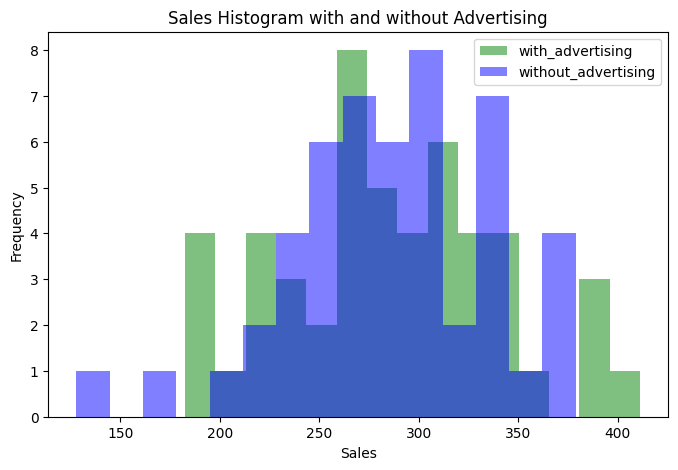

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
# Create two subplots
plt.figure(figsize=(8, 5))
plt.hist(sales_with_advertising, bins=15, alpha=0.5, color='green', label= 'with_advertising')
plt.hist(sales_without_advertising, bins=15, alpha=0.5, color='blue', label= 'without_advertising')

# Adicionar rótulos e título
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Histogram with and without Advertising')
plt.legend()
plt.show()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()



Hypotheses of this independent samples test:\
$H_0$: average without = average with\
$H_1$: mean without < mean with

In [45]:
from scipy.stats import ttest_ind

# Perform the independent samples t-test
statistic, p_value = ttest_ind(a=sales_with_advertising, b=sales_without_advertising, alternative='greater')

# Print the results
print("Statistic:", statistic)
print("P-value:", p_value)

# Define the significance level
significance_level = 0.05

# Check the null hypothesis based on the p-value
if p_value < significance_level:
    conclusion = "Reject the null hypothesis: There is evidence that advertising has a positive effect on sales."
else:
    conclusion = "Does not reject null hypothesis: There is not enough evidence to affirm a positive effect on sales due to advertising."

print("Conclusion:", conclusion)


Statistic: 0.03731421838932492
P-value: 0.48515518670338376
Conclusion: Does not reject null hypothesis: There is not enough evidence to affirm a positive effect on sales due to advertising.



## 4.2 Paired samples

> Case 6: Customer service team training program
of e-commerce wants to evaluate the impact of a training program on its performance. The company collected pre- and post-training performance review data for the same employees. They want to determine if there is a significant difference in assessments before and after training.

In [46]:
before_training = [78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
after_the_training = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [47]:
# Comparing before and after
result_subtraction = [b - a for a, b in zip(before_training,after_the_training)]

In [48]:
result_subtraction

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]


Hypotheses of this paired samples test:\
$H_0: μ_d = 0$\
$H_1: μ_d > 0 $

$μ_d$ is the average of the pairwise differences.

In [49]:
#importing the paired test ttest_rel
from scipy.stats import ttest_rel


In [50]:
#importing the paired test ttest_rel
statistic, p_value = ttest_rel(a=after_the_training, b=before_training, alternative='greater')

# Print the results
print("Statistic:", statistic)
print("P-value:", p_value)

# Define the significance level
significance_level = 0.05

# Check the null hypothesis based on the p-value
if p_value < significance_level:
    conclusion = "Reject the null hypothesis: There is evidence that training has a positive effect on performance."
else:
    conclusion = "Does not reject null hypothesis: There is not enough evidence to affirm a positive effect on performance due to training."

print("Conclusion:", conclusion)


Statistic: 4.619361962060379
P-value: 0.000627744161772394
Conclusion: Reject the null hypothesis: There is evidence that training has a positive effect on performance.


# 5. Non-parametric tests
## 5.1 Limitations of parametric tests

* Data with influential outliers
* Does not make assumptions for distribution
* Used when we have very small samples and cannot identify the distribution of the data
* Qualitative analysis

## 5.2 Applying Mann-Whitney test

> Case 7: Compare the effectiveness of two physical training methodologies, called Training A and Training B, in terms of improving athletic performance. Study participants were randomly divided into two groups, one undergoing Training A and the other undergoing Training B. The strength gain of each individual who did Training A and those who did Training B was recorded.

In [51]:
# Performance data of the two groups
training_a = [5, 3, 8, 4, 6]
training_b = [4, 2, 7, 5, 3]

In [52]:
# Importando teste mannwhitneyu

from scipy.stats import mannwhitneyu



$H_0:$ The distributions of the two populations are equal.\
$H_1:$ The distributions of the two populations are different.

In [53]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(training_a, training_b, alternative='two-sided')

# Print the results
print("Statistic:", statistic)
print("P-value:", p_value)

# Define the significance level
significance_level = 0.05

# Check the null hypothesis based on the p-value
if p_value < significance_level:
    conclusion = "Reject the null hypothesis: There is evidence of a significant difference between the two training methods."
else:
    conclusion = "Does not reject null hypothesis: There is not enough evidence to affirm a significant difference between the two training methods."

print("Conclusion:", conclusion)


Statistic: 16.5
P-value: 0.4605966187047713
Conclusion: Does not reject null hypothesis: There is not enough evidence to affirm a significant difference between the two training methods.


## 5.3 Utilizando o teste de Wilcoxon


> Case 8: The gym reorganized the equipment layout, changing from a Layout A to a Layout B, and wants to assess whether this change had a significant impact on the preferences of the regulars. The gym is interested in comparing customer preferences before and after the change.

**Paired samples**

In [54]:
# Consumer preferences before and after the layout change
preferences_before = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferences_after = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]

In [55]:
#differences in perception
result_subtraction = [b - a for a, b in zip(preferences_before,preferences_after)]
result_subtraction

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]

In [58]:
#mean and median
np.mean(result_subtraction)

1.7

In [59]:
np.median(result_subtraction)

2.5


$H_0$: The median of the differences between pairs is zero.\
$H_1$: The median of the differences between pairs is not zero.

In [61]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(preferences_after, preferences_before, alternative='greater')

# Print the results
print("Statistic:", statistic)
print("P-value:", p_value)

# Define the significance level
significance_level = 0.05

# Check the null hypothesis based on the p-value
if p_value < significance_level:
    conclusion = "Reject the null hypothesis: There is evidence of a significant difference in preferences before and after the layout change."
else:
    conclusion = "Does not reject null hypothesis: There is not enough evidence to affirm a significant difference in preferences before and after the layout change."

print("Conclusion:", conclusion)


Statistic: 48.5
P-value: 0.0185546875
Conclusion: Reject the null hypothesis: There is evidence of a significant difference in preferences before and after the layout change.
